# EDA-pokemon


![Image Name](https://cdn.kesci.com/user_upload/image/1526980834825_49089.jpg?imageView2/0/w/960/h/960)


## 目录:


#### Part1: 探索性数据分析:
1)特征分析.

2)发现特征间的关系和趋势
#### Part2: 特征工程和数据清洗:
1)移除多余的特征

2)数据类型的转换

#### Part3: 预测模型
1)基本算法

2)交叉验证

3)集成算法

4)重要特征抽取

** 描述数据**
* ＃ID：每个宠物小精灵的ID
* 名称：每个口袋妖怪的名字
* 属性1：每个口袋妖怪都有一个属性，这决定了他们的克制与被克制关系
* 属性2：还有一些口袋妖怪是双重属性的
* 总计：所有的统计数据的总和，某种程度上决定了精灵的强弱
* HP：生命值，在被击倒之前宠物小精灵可以承受多少的伤害
* 攻击：物理攻击的基础数值（例如Scratch，Punch）
* 防御：抵抗物理攻击的基础数值
* SP攻击：特殊攻击，特殊攻击的基础数值（例如火焰爆炸，泡沫射线）
* SP Def：抵抗特殊攻击的基础数值
* 速度：决定宠物小精灵的进攻顺序
* 世代： 该精灵在第几世代中出现
* 神兽： 该精灵是否为神兽

## Part1: 探索性数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'Pokemon.csv')

In [3]:
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data=data.drop('Total',axis=1)

In [5]:
data.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### 将'#'列设置为索引行

In [6]:
data=data.set_index('#')

In [7]:
data.head(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
#修改索引名称,其实不该也行,我就是喜欢整洁(*^▽^*)
data.index.name=''
data.head(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [9]:
#检查缺失值数量
data.isnull().sum()

Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Tpye2**有386个缺失值,稍后查看具体详情

## 查看**Legendary**占比

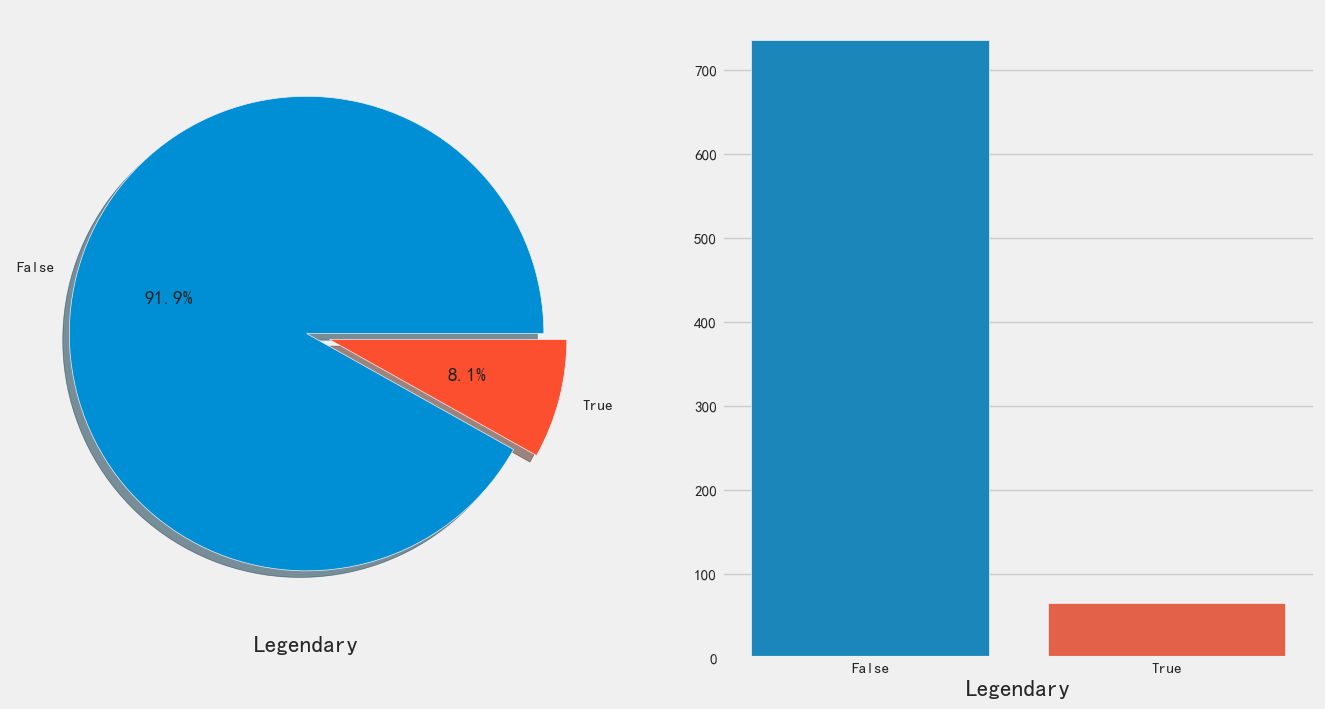

In [10]:
#神兽： 该精灵是否为神兽
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
f,ax=plt.subplots(1,2,figsize=(15,8))
data['Legendary'].value_counts().plot.pie(ax=ax[0],shadow=True,explode=[0,0.1],autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('Legendary')
sns.countplot(x='Legendary',data=data,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Legendary')
plt.show()

* **神兽的比例很少,占8.1%** **非神兽占91.9%**
* **探索一下神兽具有什么样的突出特性**

## 了解一下数据类型

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [12]:
data.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


**分类特征(Categorical Features):Name,Type 1,Type 2**

In [13]:
data.describe(include=['O'])

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


**序数特征(Ordinal Features):Generation**

In [14]:
data.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

**连续性特征(Continous Feature)**
* HP
* Attack
* Defense
* Sp. Atk
* Sp. Def
* Speed

## 特征分析

### 分类特征分析
***Type 1--> 分类特征***

In [15]:
data[['Type 1','Legendary']].groupby('Type 1').count()

,Legendary
Type 1,
Bug,69
Dark,31
Dragon,32
Electric,44
Fairy,17
Fighting,27
Fire,52
Flying,4
Ghost,32


<Axes: xlabel='Type 1', ylabel='count'>

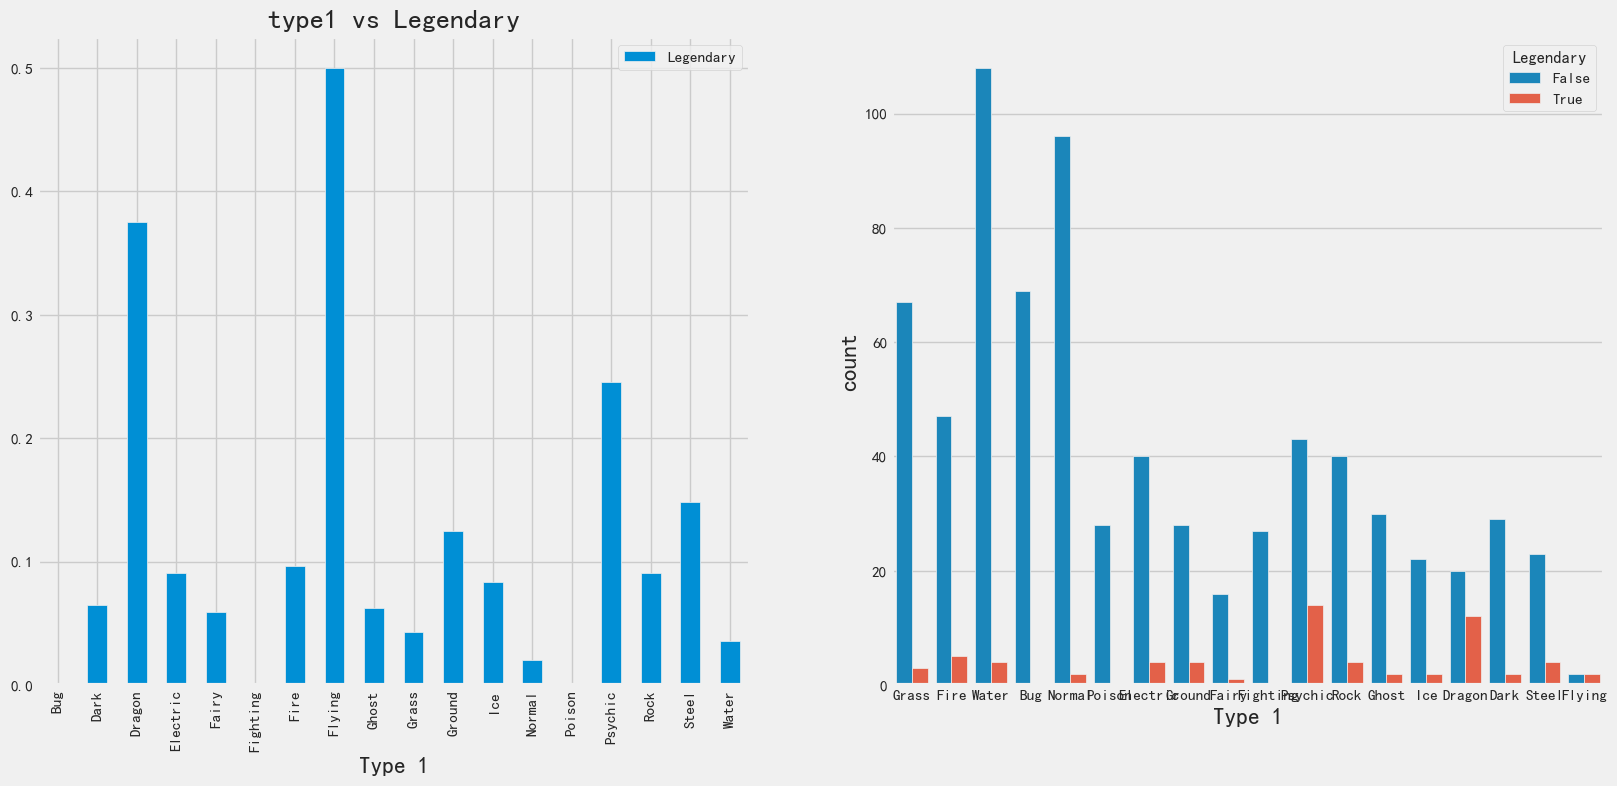

In [16]:
#属性1：每个口袋妖怪都有一个属性，这决定了他们的克制与被克制关系
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Type 1','Legendary']].groupby('Type 1').mean().plot.bar(ax=ax[0])
ax[0].set_title('type1 vs Legendary')
sns.countplot(x='Type 1',hue='Legendary',data=data,ax=ax[1])

**可以粗略看出Dragon,flying和psychic称为神兽的可能性较高,尤其会飞**
***Type 2--> 分类特征***

In [17]:
data[['Type 2']].describe()

,Type 2
count,414
unique,18
top,Flying
freq,97


In [18]:
data['Type 2'].fillna('empty',inplace=True)

<Axes: xlabel='Type 2', ylabel='count'>

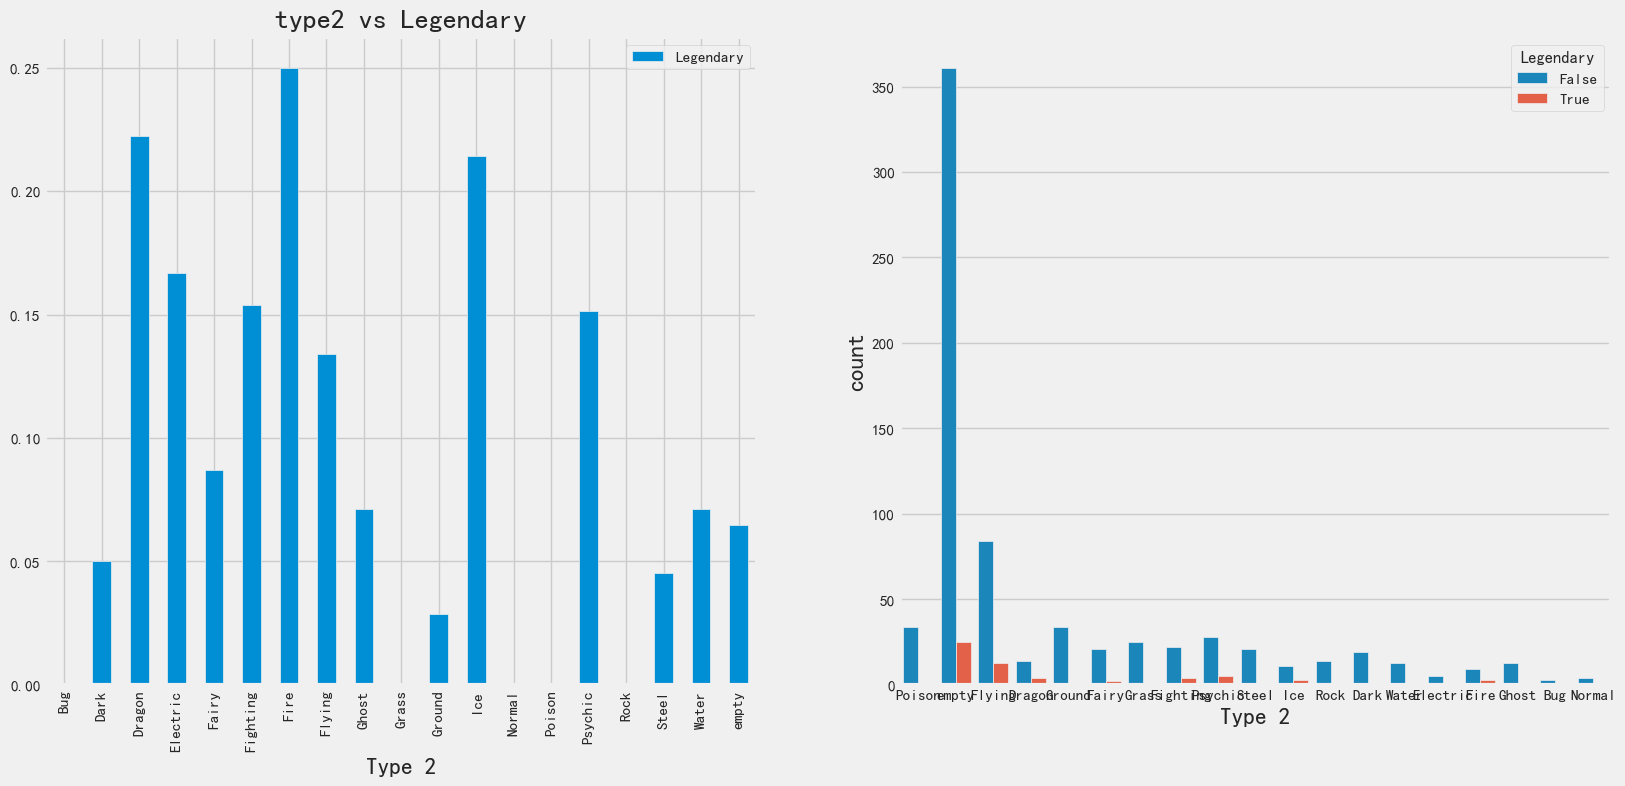

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Type 2','Legendary']].groupby('Type 2').mean().plot.bar(ax=ax[0])
ax[0].set_title('type2 vs Legendary')
sns.countplot(x='Type 2',hue='Legendary',data=data,ax=ax[1])

**type2缺失数据太多,移除**
### 序数特征分析
***Generation--> 序数特征***

In [20]:
pd.crosstab(data.Generation,data.Legendary,margins=True).style.background_gradient(cmap='summer_r')

Legendary,False,True,All
Generation,,,
1,160,6,166
2,101,5,106
3,142,18,160
4,108,13,121
5,150,15,165
6,74,8,82
All,735,65,800


第三代神兽比例:  0.11
第四代神兽比例:  0.11
第五代神兽比例:  0.09
第六代神兽比例:  0.1


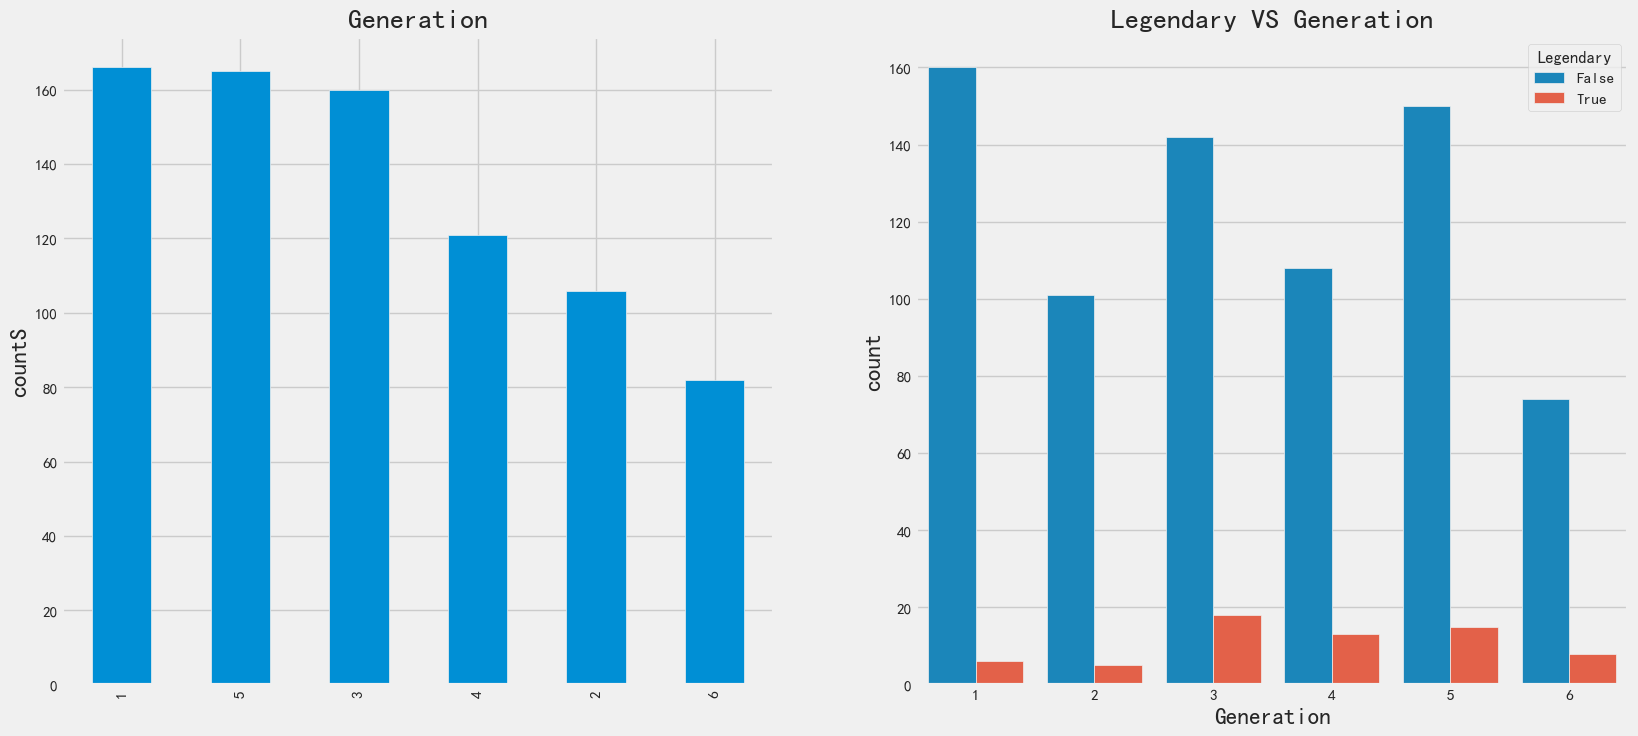

In [21]:
plt.rcParams['font.sans-serif']=['SimHei']
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('countS')
ax[0].set_title('Generation')
sns.countplot(x='Generation',hue='Legendary',data=data,ax=ax[1])
ax[1].set_title('Legendary VS Generation')
print("第三代神兽比例: ", round(18/160,2))
print("第四代神兽比例: ", round(13/121,2))
print("第五代神兽比例: ", round(15/165,2))
print("第六代神兽比例: ", round(8/82,2))

**在第三,四,五代出现神兽的比例较高,分别为11%,11%,9%**
### 连续性特征分析
***HP-->连续性特征***

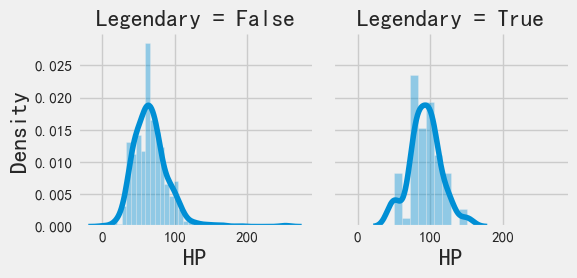

In [22]:
#HP：生命值，在被击倒之前宠物小精灵可以承受多少的伤害
#g=sns.FacetGrid(data,col='Legendary',size=5)
#g.map(plt.hist,'HP',bins=20)
g = sns.FacetGrid(data, col='Legendary')
g = g.map(sns.distplot, "HP")

not Legendary HP: 60
Legendary HP: 100


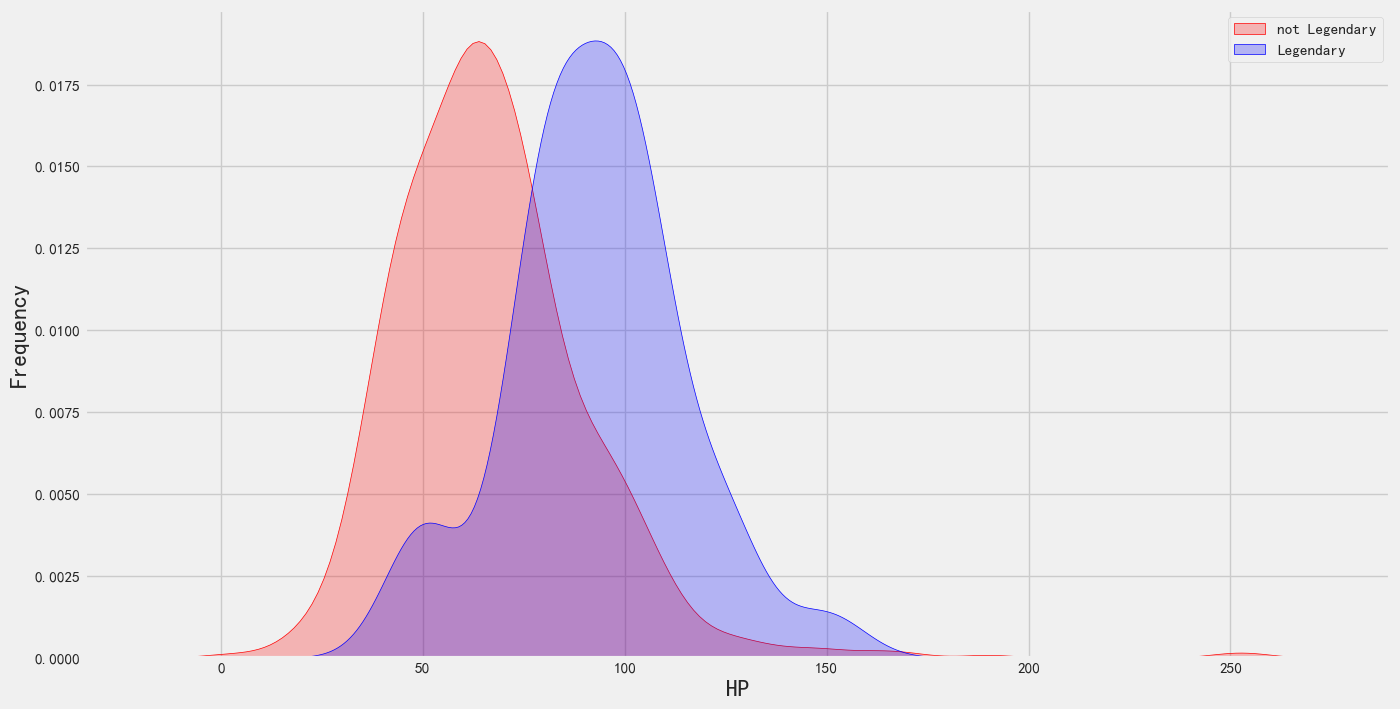

In [23]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(data["HP"][data["Legendary"] == False], color="Red", shade = True)
g = sns.kdeplot(data["HP"][data["Legendary"] == True], ax =g, color="Blue", shade= True)
g.set_xlabel("HP")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","Legendary"])
print('not Legendary HP:',data["HP"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary HP:',data["HP"][data["Legendary"] == 1].value_counts().index[0])

**神兽的HP高.HP(在被击倒之前宠物小精灵可以承受的伤害)100为神兽,HP主要在60左右基本为非神兽**
***Attack-->连续性特征***

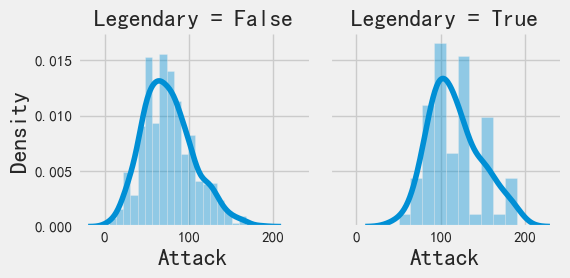

In [24]:
#Attack,物理攻击的基础数值（例如Scratch，Punch）
g=sns.FacetGrid(data,col='Legendary')
g.map(sns.distplot,'Attack')

not Legendary Attack: 65
Legendary Attack: 100


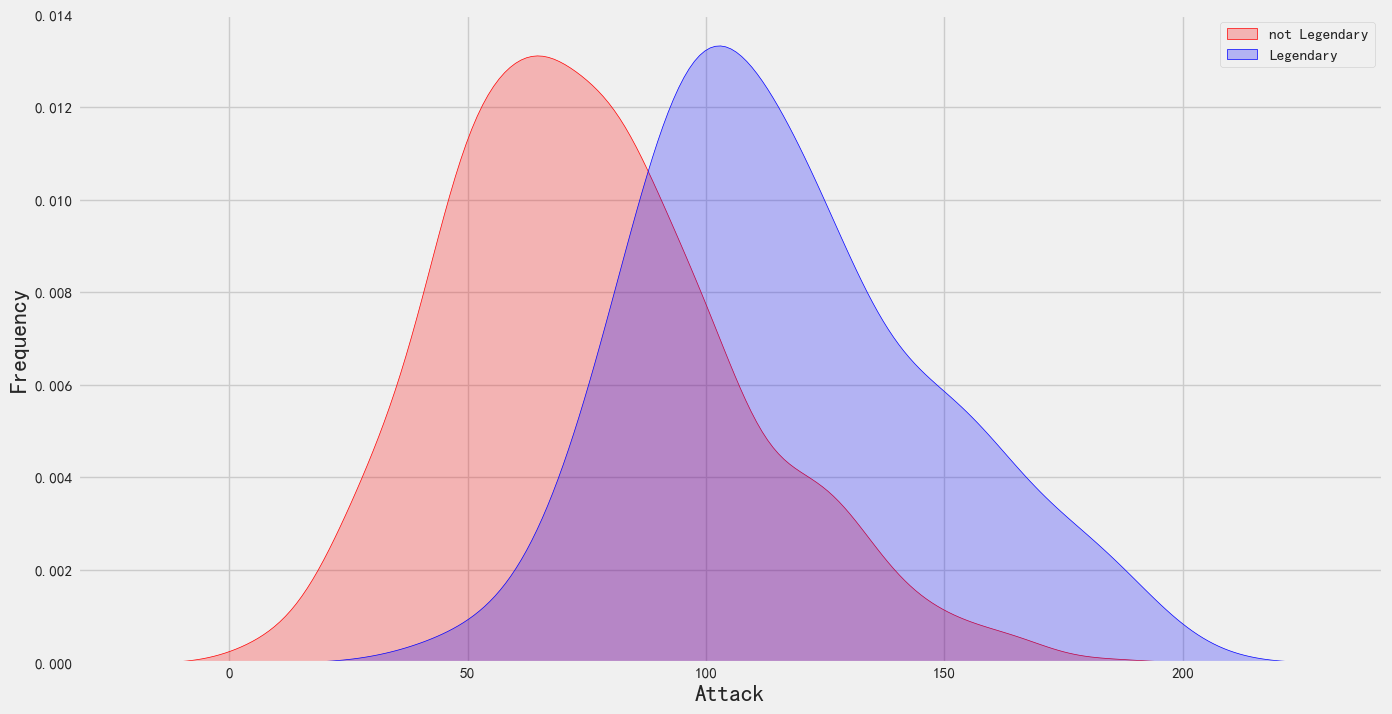

In [25]:
plt.figure(figsize=(15,8))
g=sns.kdeplot(data['Attack'][data['Legendary']==0],color='Red',shade=True)
g=sns.kdeplot(data['Attack'][data['Legendary']==1],color='Blue',shade=True,ax=g)
g.set_xlabel('Attack')
g.set_ylabel('Frequency')
g.legend(["not Legendary","Legendary"])
print('not Legendary Attack:',data["Attack"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary Attack:',data["Attack"][data["Legendary"] == 1].value_counts().index[0])

**神兽的物理攻击的基础数值比非神兽高.神兽的attack高**
***Defense-->连续性特征***

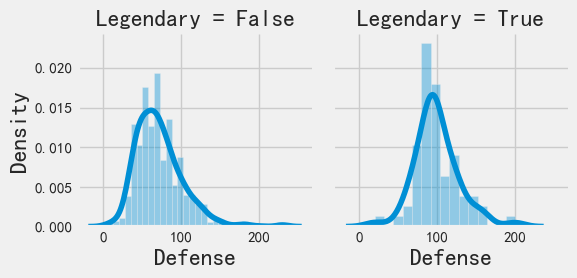

In [26]:
#Defense抵抗物理攻击的基础数值
g=sns.FacetGrid(data,col='Legendary')
g.map(sns.distplot,'Defense')

not Legendary Defense: 70
Legendary Defense在: 90


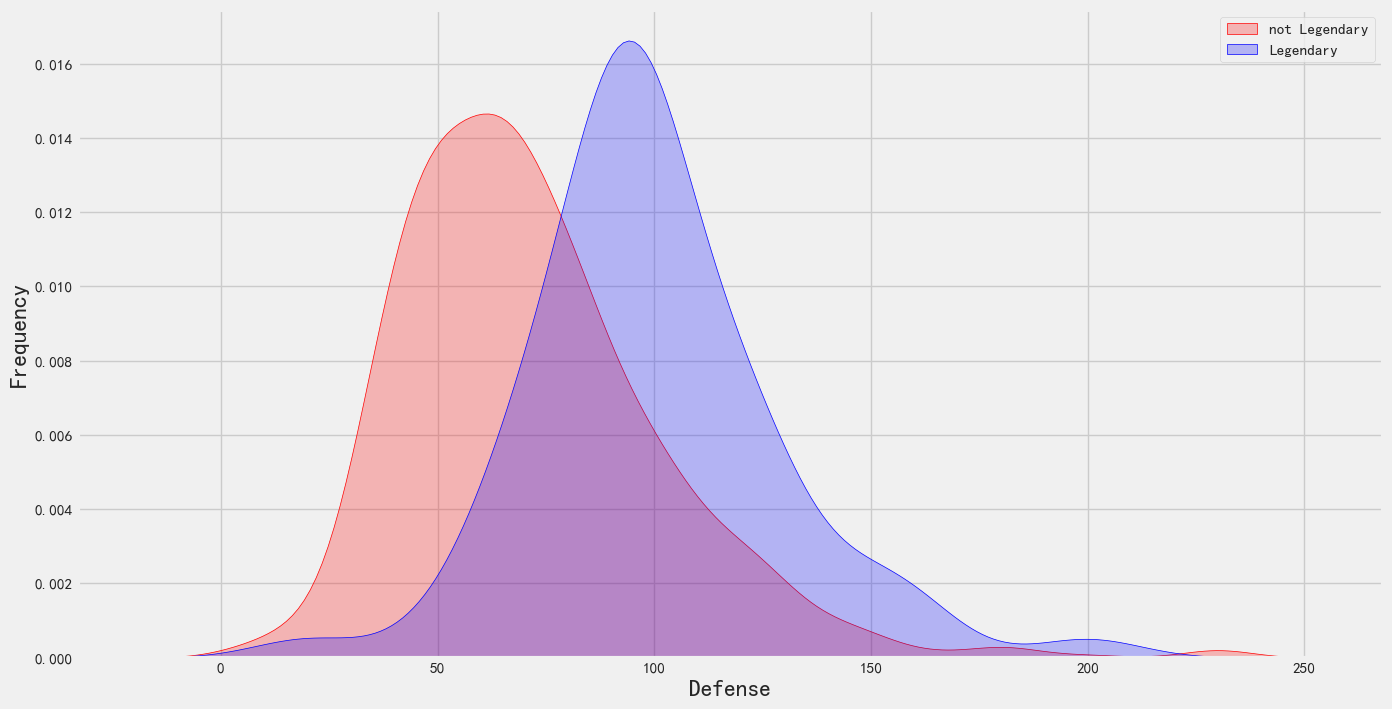

In [27]:
plt.figure(figsize=(15,8))
g=sns.kdeplot(data['Defense'][data['Legendary']==0],color='Red',shade=True)
g=sns.kdeplot(data['Defense'][data['Legendary']==1],color='Blue',shade=True,ax=g)
g.set_xlabel('Defense')
g.set_ylabel('Frequency')
g.legend(["not Legendary","Legendary"])
print('not Legendary Defense:',data["Defense"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary Defense在:',data["Defense"][data["Legendary"] == 1].value_counts().index[0])

**神兽抵抗物理攻击的基础数值非神兽的HP在70,神兽的HP在90,神兽Defense高**
***Sp. Atk-->连续性特征***

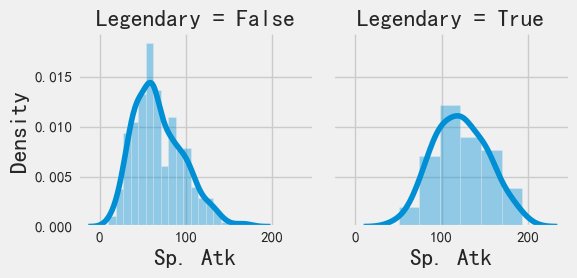

In [28]:
#SP攻击：特殊攻击，特殊攻击的基础数值（例如火焰爆炸，泡沫射线）
g=sns.FacetGrid(data,col='Legendary')
g.map(sns.distplot,'Sp. Atk')

not Legendary Sp. Atk: 60
Legendary Sp. Atk: 150


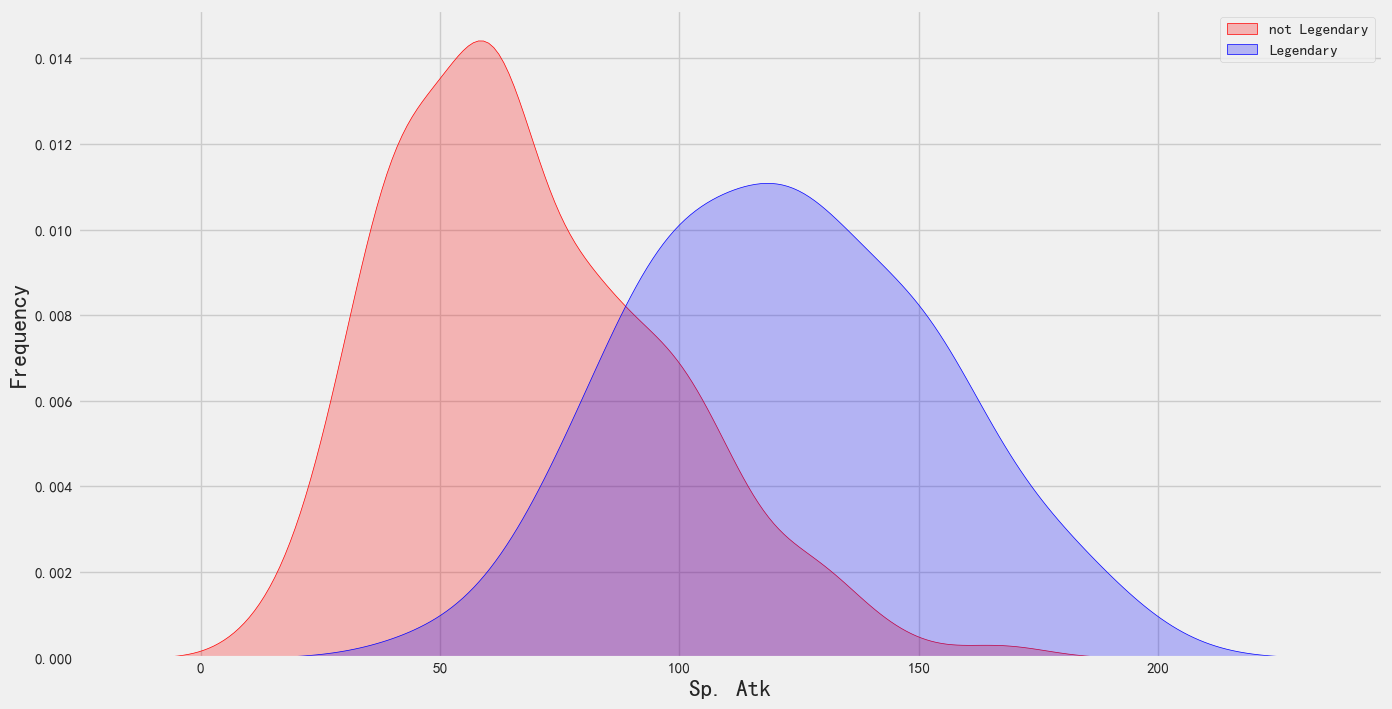

In [29]:
plt.figure(figsize=(15,8))
g=sns.kdeplot(data['Sp. Atk'][data['Legendary']==0],color='Red',shade=True)
g=sns.kdeplot(data['Sp. Atk'][data['Legendary']==1],color='Blue',shade=True,ax=g)
g.set_xlabel('Sp. Atk')
g.set_ylabel('Frequency')
g.legend(["not Legendary","Legendary"])
print('not Legendary Sp. Atk:',data["Sp. Atk"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary Sp. Atk:',data["Sp. Atk"][data["Legendary"] == 1].value_counts().index[0])

**神兽的特殊攻击力超强**
***Sp. Def-->连续性特征***

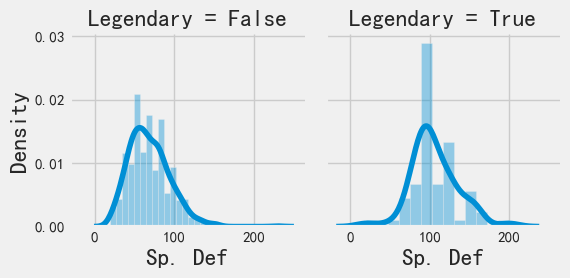

In [30]:
#SP Def：抵抗特殊攻击的基础数值
g=sns.FacetGrid(data,col='Legendary')
g.map(sns.distplot,'Sp. Def')

not Legendary Sp. Def: 50
Legendary Sp. Def: 90


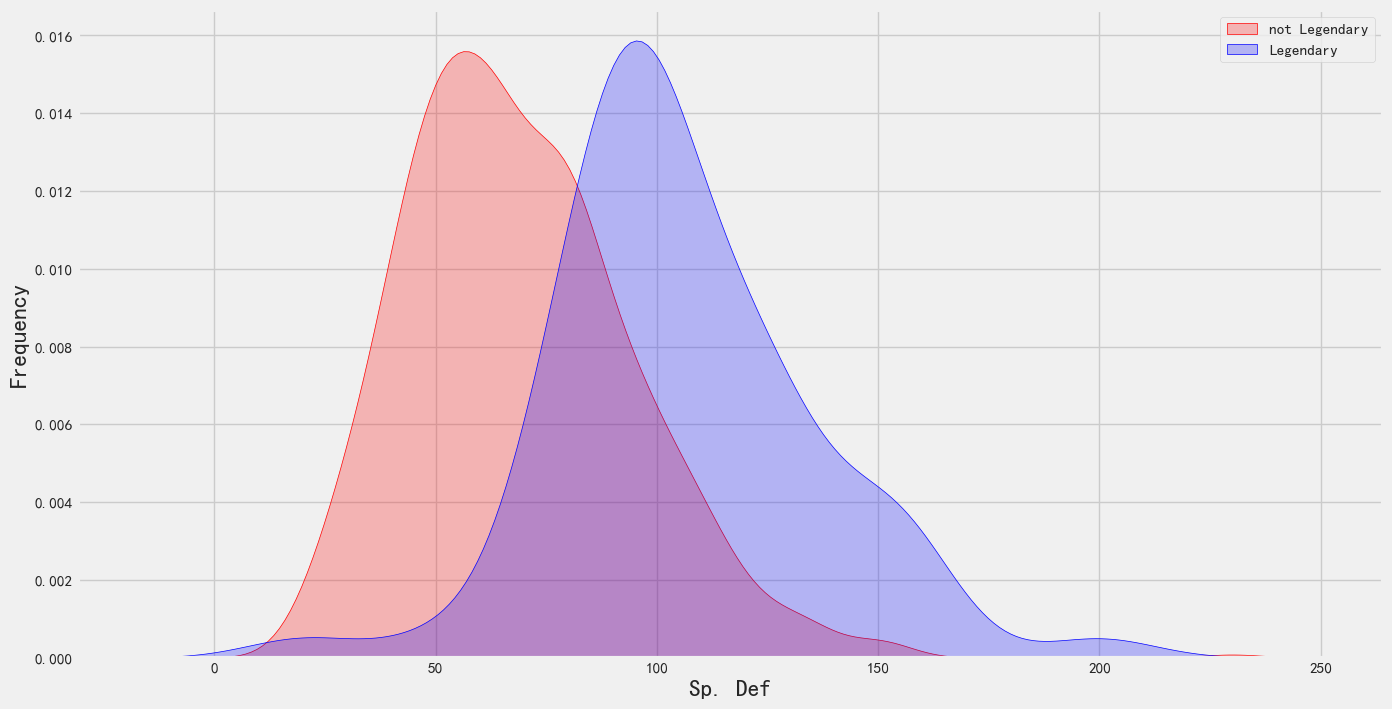

In [31]:
plt.figure(figsize=(15,8))
g=sns.kdeplot(data['Sp. Def'][data['Legendary']==0],color='Red',shade=True)
g=sns.kdeplot(data['Sp. Def'][data['Legendary']==1],color='Blue',shade=True,ax=g)
g.set_xlabel('Sp. Def')
g.set_ylabel('Frequency')
g.legend(["not Legendary","Legendary"])
print('not Legendary Sp. Def:',data["Sp. Def"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary Sp. Def:',data["Sp. Def"][data["Legendary"] == 1].value_counts().index[0])

**神兽的特殊防御高**
***Speed-->连续性特征***

# 速度：决定宠物小精灵的进攻顺序
g=sns.FacetGrid(data,col='Legendary',size=5)
g.map(sns.distplot,'Speed')

not Legendary Speed: 50
Legendary Speed: 90


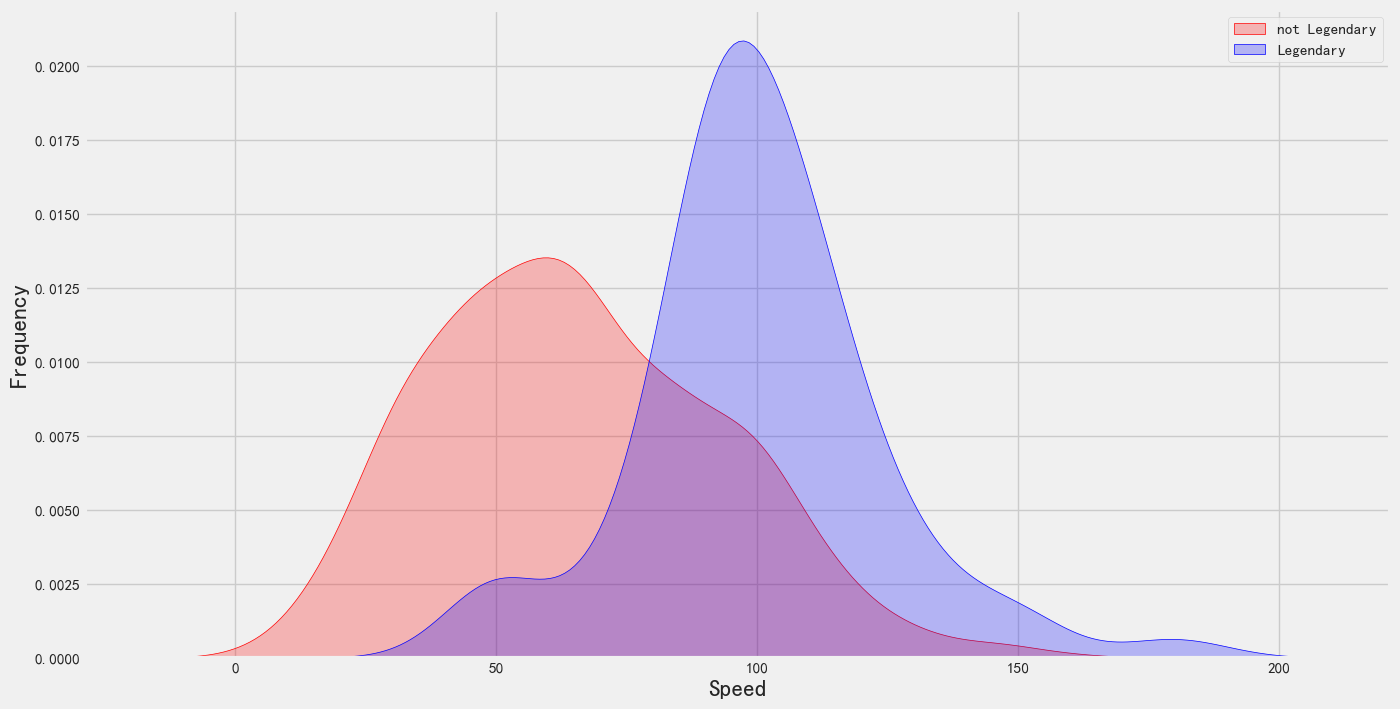

In [32]:
plt.figure(figsize=(15,8))
g=sns.kdeplot(data['Speed'][data['Legendary']==0],color='Red',shade=True)
g=sns.kdeplot(data['Speed'][data['Legendary']==1],color='Blue',shade=True,ax=g)
g.set_xlabel('Speed')
g.set_ylabel('Frequency')
g.legend(["not Legendary","Legendary"])
print('not Legendary Speed:',data["Sp. Def"][data["Legendary"] == 0].value_counts().index[0])
print('Legendary Speed:',data["Sp. Def"][data["Legendary"] == 1].value_counts().index[0])

**神兽的速度快**

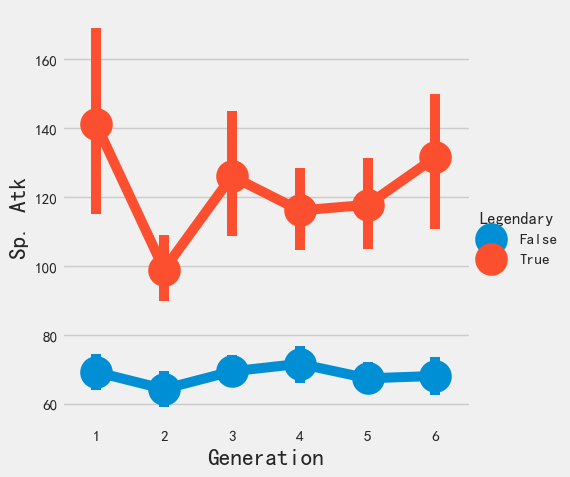

In [33]:
sns.catplot(x='Generation',y='Sp. Atk',hue='Legendary',data=data,kind='point')
plt.show()

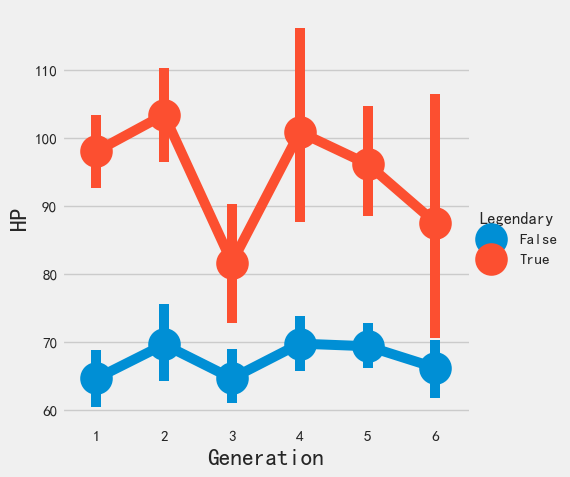

In [34]:
sns.catplot(x='Generation',y='HP',hue='Legendary',data=data,kind='point')
plt.show()

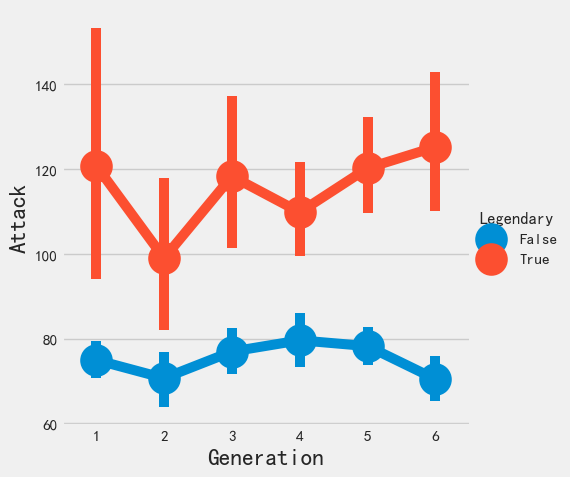

In [35]:
sns.catplot(x='Generation',y='Attack',hue='Legendary',data=data,kind='point')
plt.show()

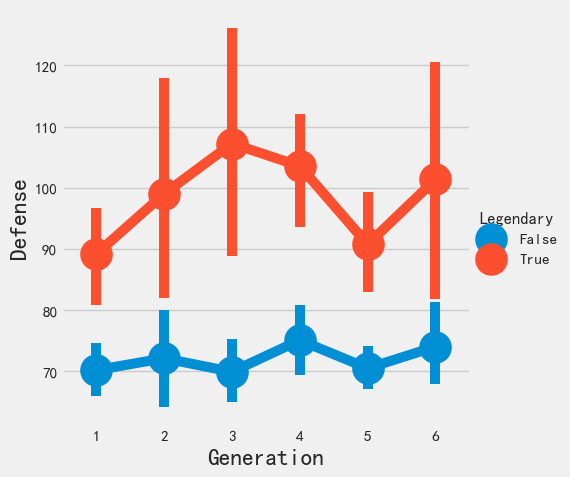

In [36]:
sns.catplot(x='Generation',y='Defense',hue='Legendary',data=data,kind='point')
plt.show()

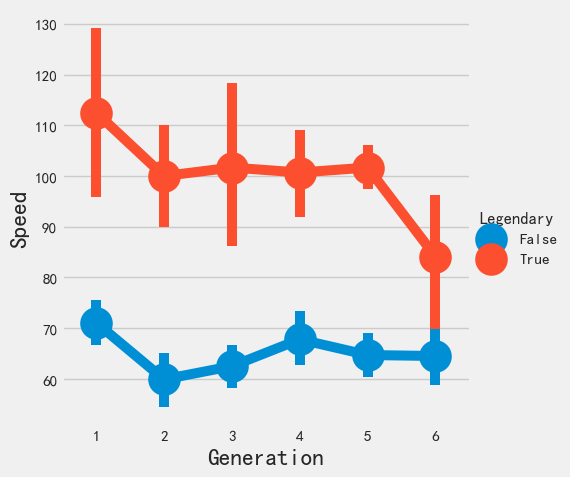

In [37]:
sns.catplot(x='Generation',y='Speed',hue='Legendary',data=data,kind='point')
plt.show()

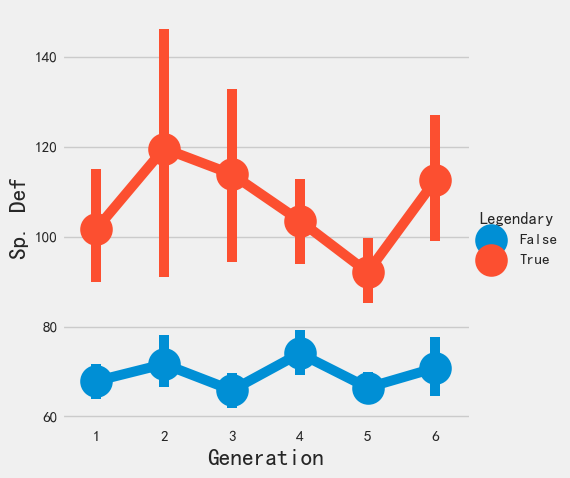

In [38]:
sns.catplot(x='Generation',y='Sp. Def',hue='Legendary',data=data,kind='point')
plt.show()

**特征的相关性**

<Axes: >

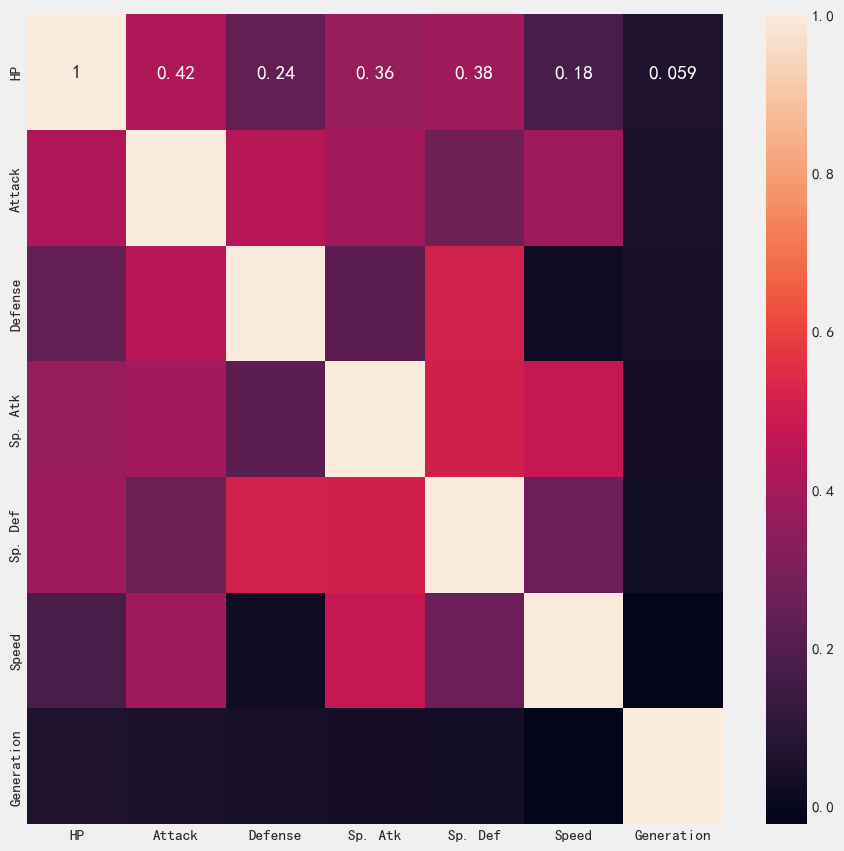

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop(['Name','Legendary'],axis=1).corr(),annot=True)

## Part2: Feature Engineering and Data Cleaning
**移除多余的特征**

In [40]:
#'Name'是小精灵的名字
#'Type 2'缺失数据太多
#'HP'的分布于'Attack'类似,drop'HP'
data.drop(['Name','Type 2','HP'],axis=1,inplace=True)

**数据类型的转换**

In [41]:
#Type 1和Legendary
data['Type 1'].value_counts().index

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric',
       'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object')

In [42]:
data['Type 1'].replace(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire',
                        'Rock','Electric', 'Ground', 'Dragon', 'Ghost', 'Dark',
                        'Poison', 'Steel','Fighting', 'Ice', 'Fairy', 'Flying'],list(range(1,19)),inplace=True)

In [43]:
data['Legendary'].value_counts().index

Index([False, True], dtype='bool')

<Axes: >

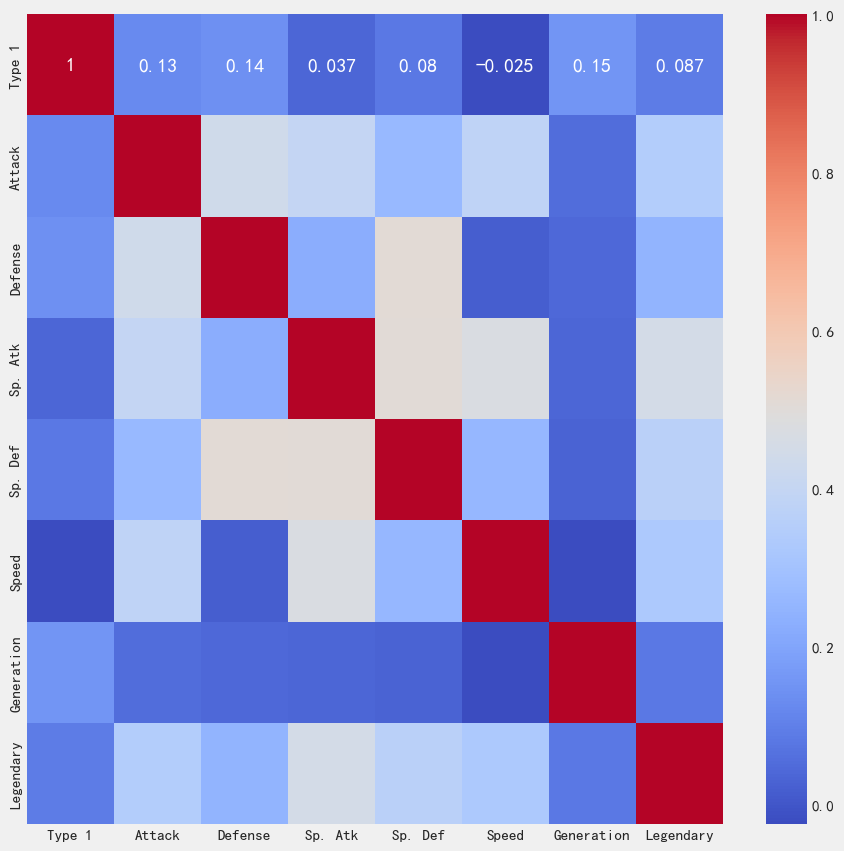

In [44]:
plt.figure(figsize=(10,10))
data['Legendary']=data['Legendary'].map({False:0,True:1})
sns.heatmap(data.corr(),annot=True,cmap = "coolwarm",)

In [45]:
data.head(5)

,Type 1,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
,,,,,,,,
1,3,49,49,65,65,45,1,0
2,3,62,63,80,80,60,1,0
3,3,82,83,100,100,80,1,0
3,3,100,123,122,120,80,1,0
4,6,52,43,60,50,65,1,0


## Part3: 预测模型

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [46]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

**划分数据集**

In [47]:
target='Legendary'
x_columns=[x for x in data.columns if x not in [target]]
X=data[x_columns]
Y=data['Legendary']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 7), (480,), (320, 7), (320,))

**rbf svm**

In [49]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is 0.934375


**linear svm**

In [50]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(x_train,y_train)
prediction2=model.predict(x_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.94375


**LogisticRegression**

In [51]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.9375


**DecisionTreeClassifier**

In [52]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.9125


**KNeighborsClassifier**

In [53]:
model=KNeighborsClassifier() 
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.93125


**KNN**

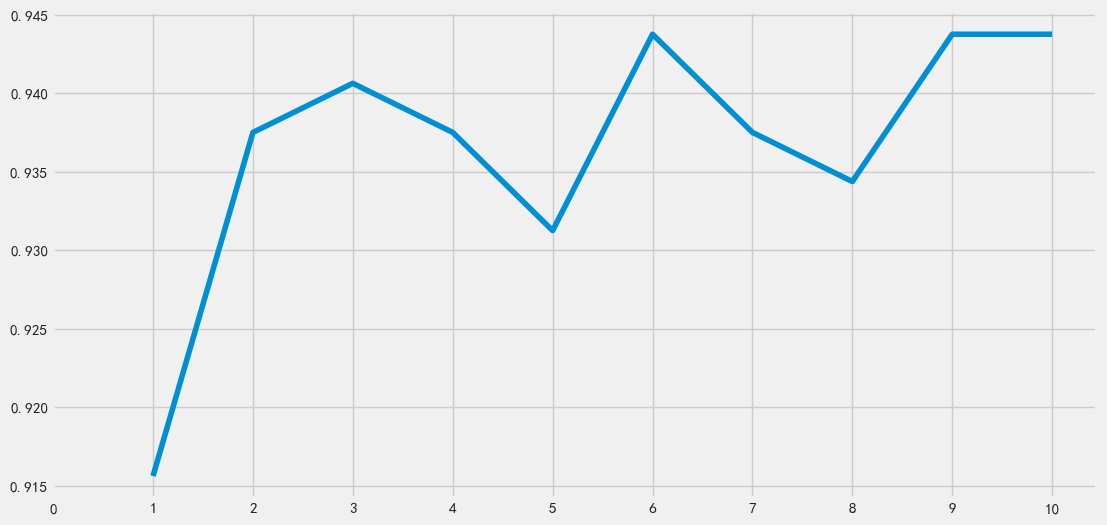

Accuracies for different values of n are: [0.915625 0.9375   0.940625 0.9375   0.93125  0.94375  0.9375   0.934375
 0.94375  0.94375 ] 
with the max value as  0.94375


In [54]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'\nwith the max value as ',a.values.max())

**高斯**

In [55]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.93125


**随机森林**

In [56]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.940625


### Cross Validation

In [57]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
# from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.94000,0.028395
Radial Svm,0.93250,0.033166
Logistic Regression,0.94250,0.038810
KNN,0.93625,0.030847
Decision Tree,0.91750,0.029155
Naive Bayes,0.93000,0.035000
Random Forest,0.94125,0.029607


<Axes: >

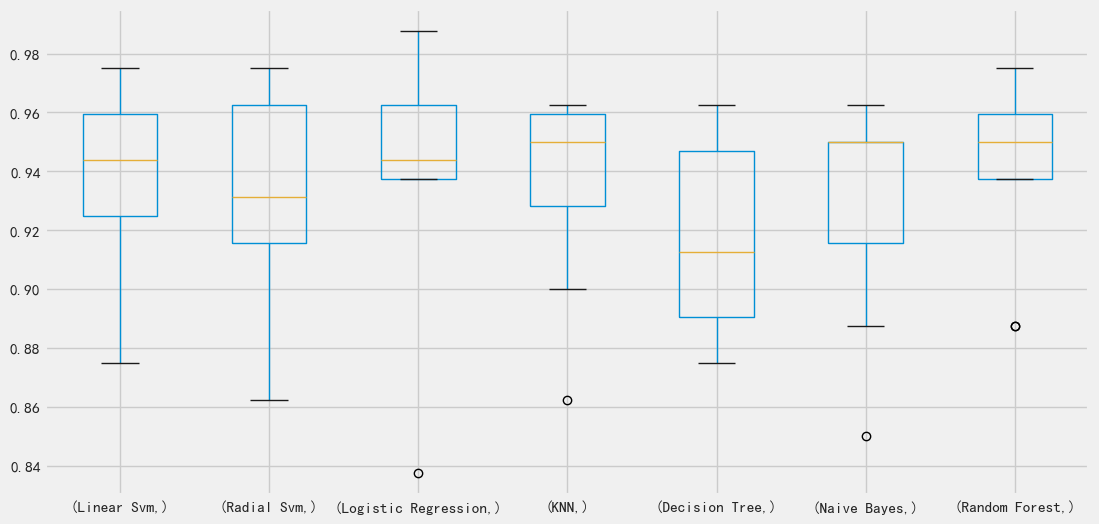

In [58]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

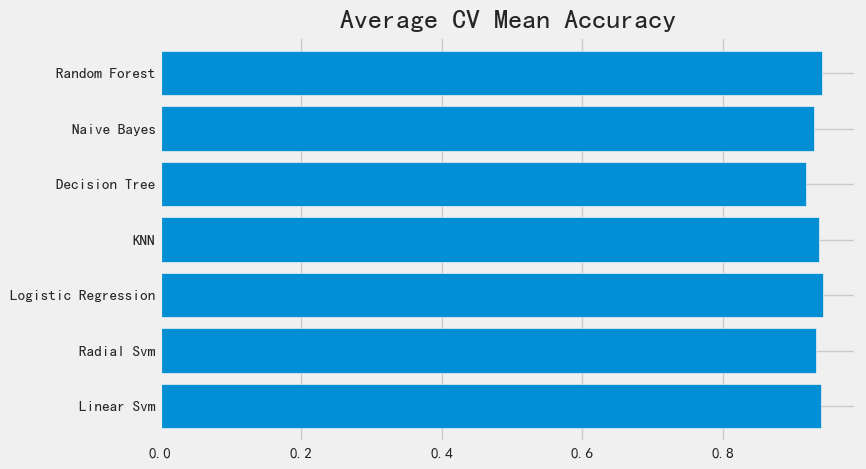

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

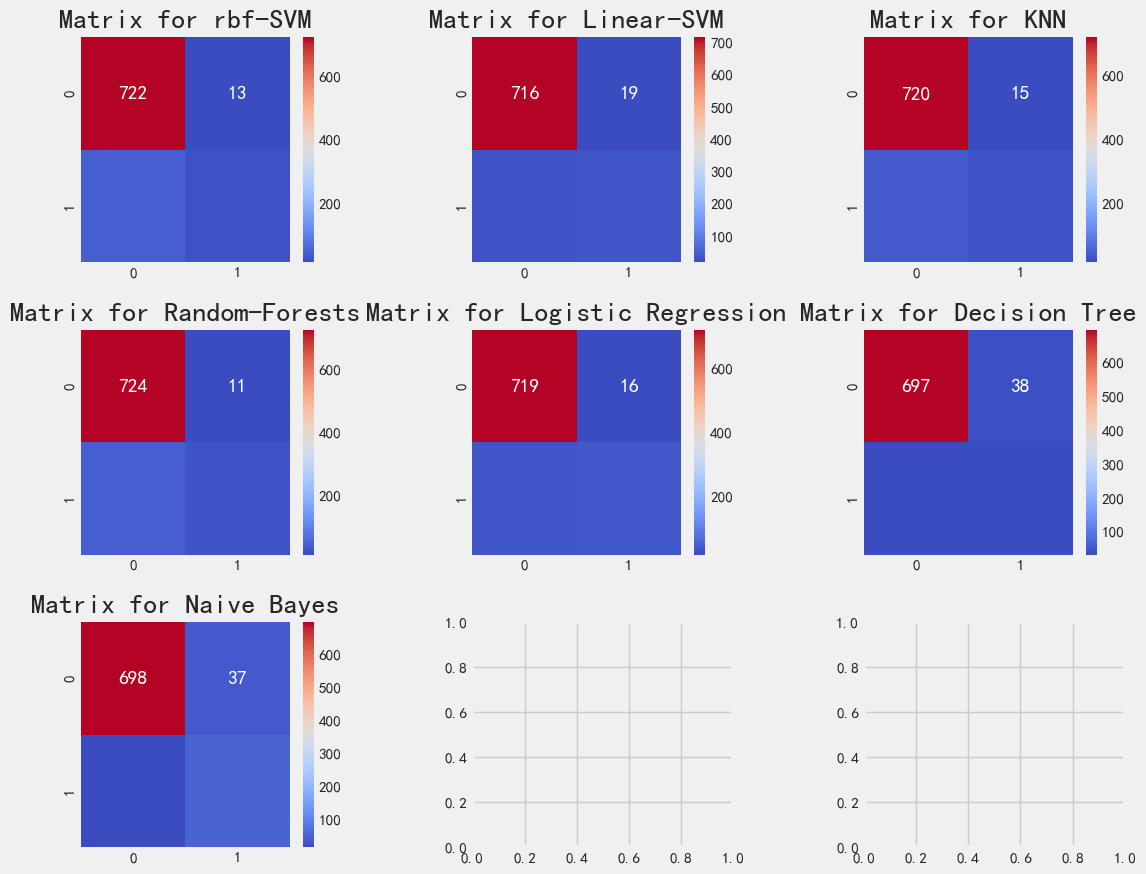

In [60]:
from sklearn.model_selection import cross_val_predict
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f',cmap='coolwarm')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f',cmap='coolwarm')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()

## 调参(Hyper-Parameters Tuning)

#### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.9412500000000001
SVC(C=0.2, gamma=0.1, kernel='linear')


### Random Forests

In [62]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9412499999999999
RandomForestClassifier(n_estimators=200, random_state=0)


## 集成算法

1)Voting Classifier

2)Bagging

3)Boosting.

### Voting Classifier

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.05,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=200,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',gamma=0.1,probability=True))
                                             ], voting='soft').fit(x_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(x_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.95
The cross validated score is 0.9337500000000001


## Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.940625
The cross validated score for bagged KNN is: 0.9287500000000002


In [65]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.940625
The cross validated score for bagged Decision Tree is: 0.93125


## Boosting
#### AdaBoost(Adaptive Boosting)

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())
ada.fit(x_train,y_train)

The cross validated score for AdaBoost is: 0.93875


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)

<Axes: >

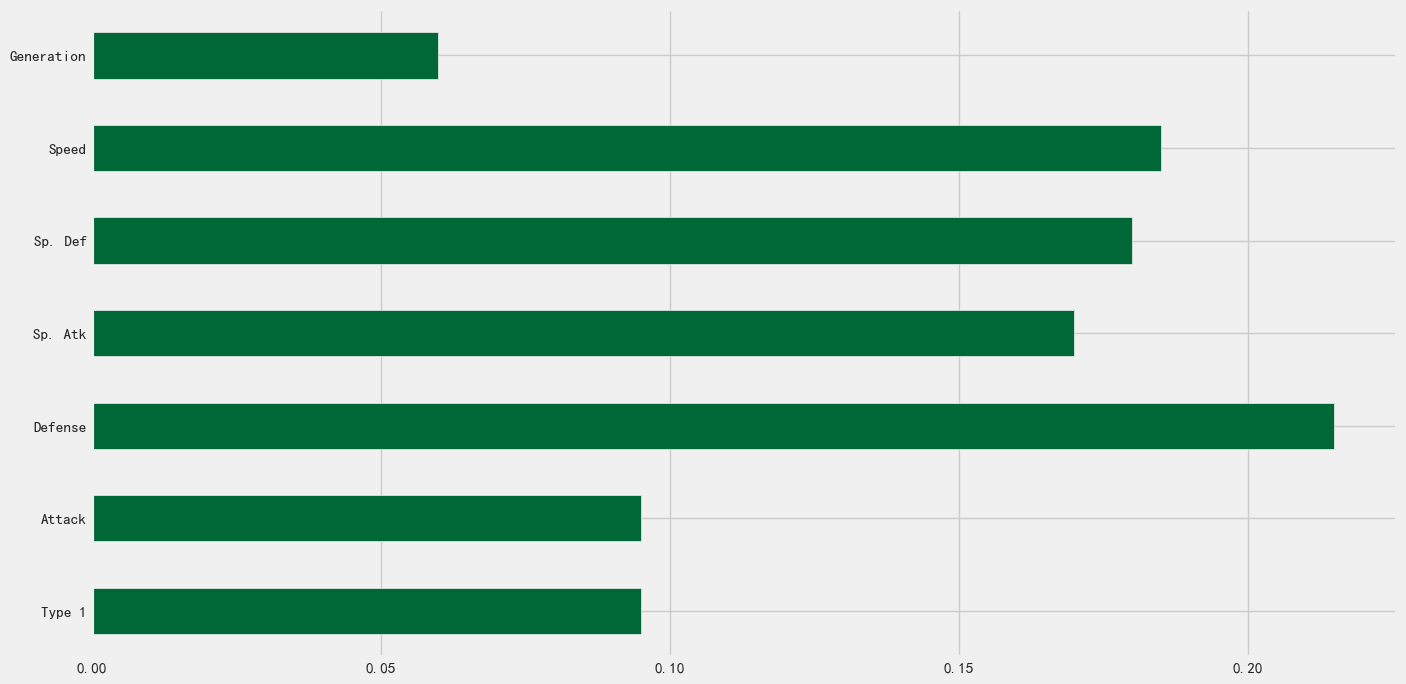

In [67]:
plt.figure(figsize=(15,8))
pd.Series(ada.fit(x_train,y_train).feature_importances_,x_train.columns).plot.barh(cmap='RdYlGn_r')

#### Hyper-Parameter Tuning for AdaBoost

In [68]:
from sklearn.model_selection import GridSearchCV
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.9412499999999999
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


#### Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.925


#### Hyper-Parameter Tuning for GradientBoosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.93
GradientBoostingClassifier(learning_rate=0.25, n_estimators=200)


#### XGBoost

In [72]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.9324999999999999


#### Hyper-Parameter Tuning for XGBoost

In [73]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=xg.XGBClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.9387500000000001
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### Confusion Matrix for the Best Model

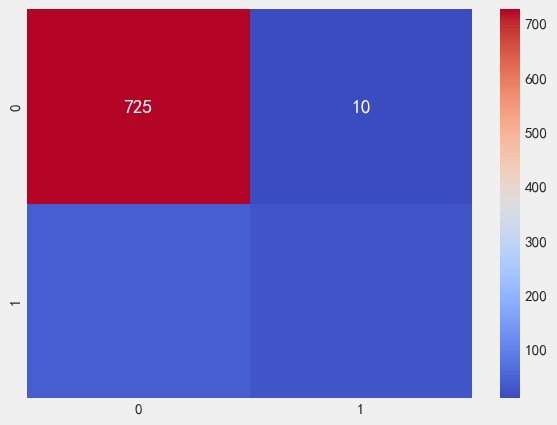

In [74]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.05,n_estimators=100)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='coolwarm',annot=True,fmt='2.0f')
plt.show()

## 特征重要性 Feature Importance

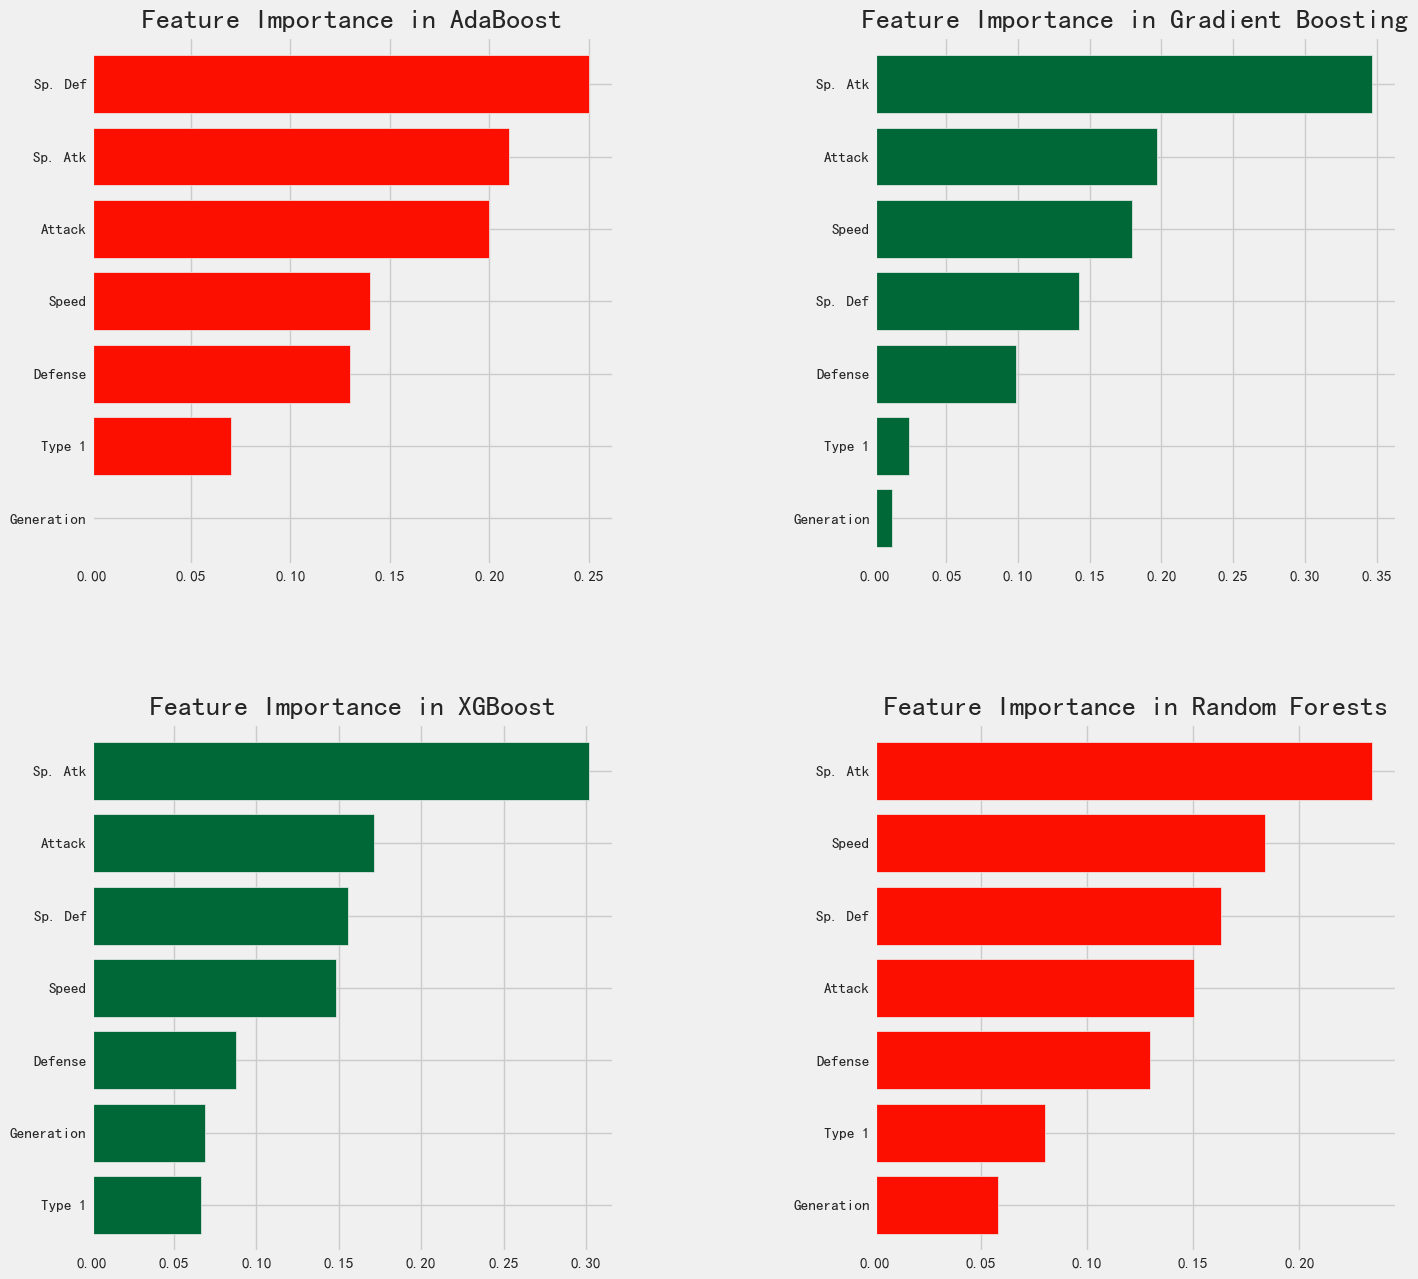

In [75]:
f,ax=plt.subplots(2,2,figsize=(15,15))
model=AdaBoostClassifier(n_estimators=100,learning_rate=0.05)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color='#FD0F00')
ax[0,0].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=0,max_depth=3)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],cmap='RdYlGn_r')
ax[0,1].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=100,learning_rate=0.05,random_state=0,max_depth=3)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in XGBoost')
model=RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in Random Forests')
plt.subplots_adjust(hspace=0.3,wspace=0.5)

* **generation在adaboost中完全不重要**
* **SP攻击,SP Def和speed是最重要的三个指标,其次为attack和defense**